            Product_Code Warehouse Product_Category Order_Demand
Date                                                            
2012-07-27  Product_0993    Whse_J     Category_028         100 
2012-01-19  Product_0979    Whse_J     Category_028         500 
2012-02-03  Product_0979    Whse_J     Category_028         500 
2012-02-09  Product_0979    Whse_J     Category_028         500 
2012-03-02  Product_0979    Whse_J     Category_028         500 

The number of warehouses based on count is:

Whse_J    764447
Whse_A    153574
Whse_S     88200
Whse_C     42354
Name: Warehouse, dtype: int64 

Order demands is as follows:

1000      112682
100        87272
1          63361
2000       51653
500        49013
           ...  
(447)          1
82600          1
3230           1
11497          1
1484           1
Name: Order_Demand, Length: 3828, dtype: int64 



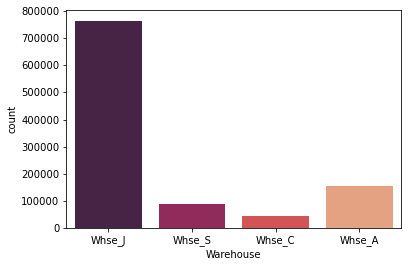

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import warnings
from sklearn.metrics import r2_score
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.statespace.sarimax import SARIMAX
warnings.filterwarnings('ignore')


demandData = pd.read_csv('C:\\Users\Brian\Desktop\EECS_731\Project5\Data\\Historical Product Demand.csv', index_col=[3], parse_dates=[3])
print(demandData.head())
print("\nThe number of warehouses based on count is:\n")
sns.countplot(x="Warehouse", palette="rocket",data=demandData)
print(demandData["Warehouse"].value_counts(), "\n")
print("Order demands is as follows:\n")
print(demandData["Order_Demand"].value_counts(), "\n")

In [104]:
After reading in the dataset, the first five entries are displayed followed by the total number of warehouses. The number of warehouses is displayed in both a numerical and graphical manner. 
From these values it is clear to see that "Whse_J" has the highest order demand.


The popularity of products based on count is:

Category_019    481099
Category_005    101671
Category_001     97787
Category_007     82402
Category_021     52011
Category_006     35577
Category_028     31302
Category_011     23208
Category_015     22954
Category_024     20885
Category_009     19738
Category_026     14803
Category_030     12997
Category_032      9296
Category_022      8657
Category_023      7899
Category_018      5239
Category_003      4189
Category_013      3743
Category_020      3490
Category_031      2280
Category_033      1849
Category_008      1560
Category_012      1147
Category_010       976
Category_029       671
Category_017       615
Category_004       329
Category_002        77
Category_016        37
Category_025        35
Category_014        26
Category_027        26
Name: Product_Category, dtype: int64 



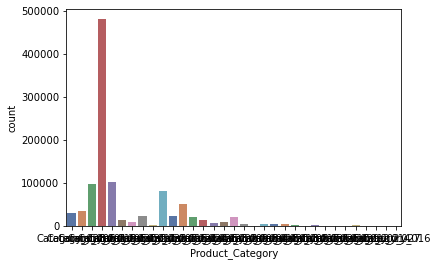

In [3]:
print("\nThe popularity of products based on count is:\n")
sns.countplot(x="Product_Category", palette="deep", data=demandData)
print(demandData["Product_Category"].value_counts(), "\n")

In [106]:
Whether the graph is vertical or horizontal it is difficult to read the category numbers.
This is why I have chosed to print the numerical values as well as the graphical representation

In [4]:
print(demandData["Product_Code"].value_counts())

Product_1359    16936
Product_1295    10575
Product_1378     9770
Product_0620     9428
Product_1286     8888
                ...  
Product_1912        2
Product_1703        1
Product_0853        1
Product_2099        1
Product_0465        1
Name: Product_Code, Length: 2160, dtype: int64


In [108]:
Since the data is stored with negative values being portrayed by parenthesis, I had to alter the "Order_Demand" column. 
I was able to portray the values accurately and displayed the results. 

In [5]:
demandData["Order_Demand"] = demandData["Order_Demand"].astype(str)
demandData["Order_Demand"] = demandData["Order_Demand"].replace('[(]', '-', regex=True).astype(str)
demandData["Order_Demand"] = demandData["Order_Demand"].replace('[)]', '', regex=True).astype(int)
demandData['Product_Category'] = demandData['Product_Category'].astype(str)
demandData['Product_Category'] = demandData['Product_Category'].replace('[Category_]', '', regex=True).astype(int)

demandData['Product_Code'] = demandData['Product_Code'].astype(str)
demandData['Product_Code'] = demandData['Product_Code'].replace('[Product_]', '', regex=True).astype(int)
print("The order demands are:\n")
print(demandData["Order_Demand"].value_counts())

The order demands are:

1000      112682
100        87272
1          63361
2000       51653
500        49013
           ...  
2214           1
453000         1
22700          1
6820           1
1535           1
Name: Order_Demand, Length: 3828, dtype: int64


In [110]:
After manipulating the data, I display how many orders the company received per month since 2012.
There was a large unexplained spike in the data just prior to the year 2014.

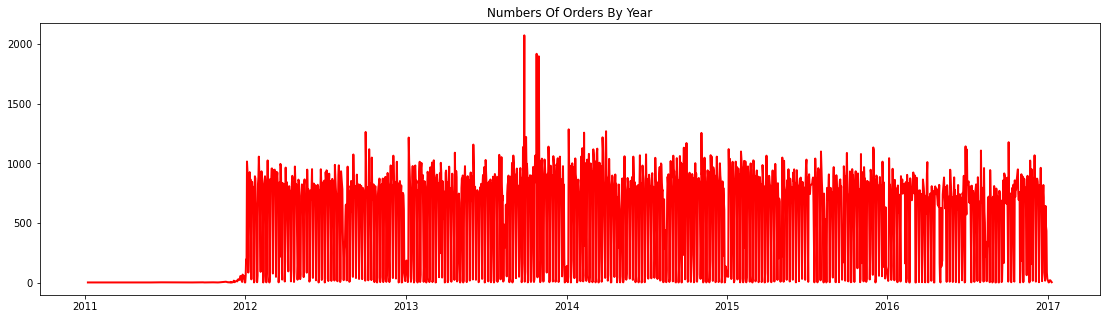

In [6]:
demandData.groupby([demandData.index.date]).count().Order_Demand.plot(color='red', figsize=(19,5), linewidth=2, markersize=12, title='Numbers Of Orders By Year')

In [7]:
demandData.sort_values(['Date', 'Product_Code', "Order_Demand"], inplace=True)
print(demandData.head(20))

            Product_Code Warehouse  Product_Category  Order_Demand
Date                                                              
2011-01-08           965    Whse_A                 6             2
2011-05-31          1724    Whse_A                 3           108
2011-06-24          1521    Whse_S                19          7000
2011-06-24          1521    Whse_S                19         85000
2011-09-02          1507    Whse_C                19          1250
2011-09-27           608    Whse_C                 1             5
2011-09-27          1933    Whse_C                 1            23
2011-09-30           875    Whse_C                23          5450
2011-10-20           125    Whse_S                11            -2
2011-10-20           412    Whse_S                 7            -2
2011-10-31           642    Whse_C                19             3
2011-11-04           202    Whse_A                 7          -400
2011-11-04           202    Whse_A                 7          

In [ ]:
At this point, the data has been manipulated and sorted based on date

In [8]:
print(demandData.head(20))
demandData = demandData.groupby(['Date','Product_Code', 'Product_Category']).sum().reset_index().set_index('Date')
demandData.sort_values(['Date', 'Product_Code'], inplace=True)

demandData['Weekday'] = demandData.index.map(lambda d : d.weekday())
series = demandData.loc[demandData['Product_Code'] == 349]['Order_Demand']
series = series.resample('D').sum()

training = series.loc[series.index < "2016-01-01"]
testing = series.loc[series.index >= "2016-01-01"]

            Product_Code Warehouse  Product_Category  Order_Demand
Date                                                              
2011-01-08           965    Whse_A                 6             2
2011-05-31          1724    Whse_A                 3           108
2011-06-24          1521    Whse_S                19          7000
2011-06-24          1521    Whse_S                19         85000
2011-09-02          1507    Whse_C                19          1250
2011-09-27           608    Whse_C                 1             5
2011-09-27          1933    Whse_C                 1            23
2011-09-30           875    Whse_C                23          5450
2011-10-20           125    Whse_S                11            -2
2011-10-20           412    Whse_S                 7            -2
2011-10-31           642    Whse_C                19             3
2011-11-04           202    Whse_A                 7          -400
2011-11-04           202    Whse_A                 7          

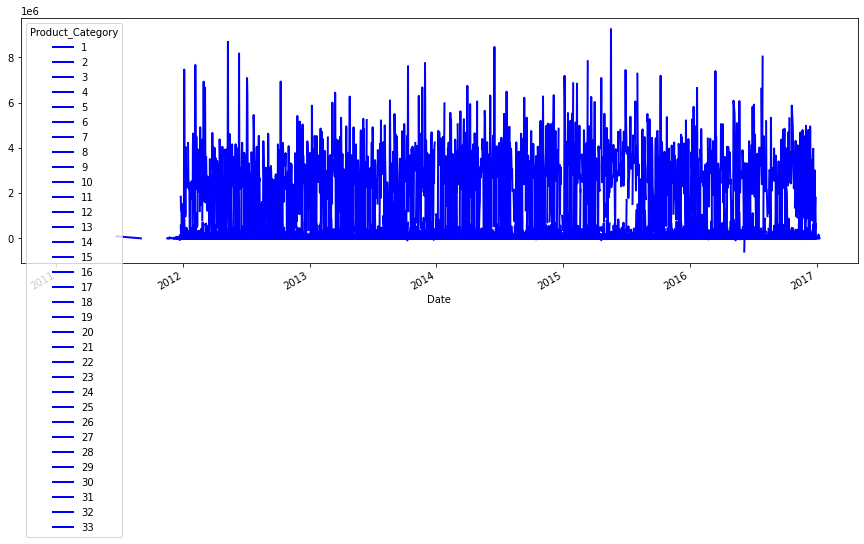

In [9]:
fig, ax = plt.subplots(figsize=(12,10))
demandData.groupby(['Date','Product_Category']).sum()["Order_Demand"].unstack().plot(ax=ax, color='blue', figsize=(15,5), linewidth=2, markersize=12, animated=True)

In [ ]:
Setup for the training model and ARIMA feature engineering statistics are displayed

In [10]:
trainMean = (training - training.mean())
trainingModel = ARIMA(trainMean, order=(2,0,0))
trainingModelFit = trainingModel.fit()
print(trainingModelFit.summary())

                              ARMA Model Results                              
Dep. Variable:           Order_Demand   No. Observations:                 1467
Model:                     ARMA(2, 0)   Log Likelihood               -9799.558
Method:                       css-mle   S.D. of innovations            192.685
Date:                Mon, 12 Oct 2020   AIC                          19607.116
Time:                        15:58:33   BIC                          19628.280
Sample:                    12-26-2011   HQIC                         19615.009
                         - 12-31-2015                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0040      5.242     -0.001      0.999     -10.279      10.271
ar.L1.Order_Demand     0.0970      0.026      3.722      0.000       0.046       0.148
ar.L2.Order_Demand  

In [ ]:
Applying an R2 regression score to the acquired data and displaying the information in the form of a graph

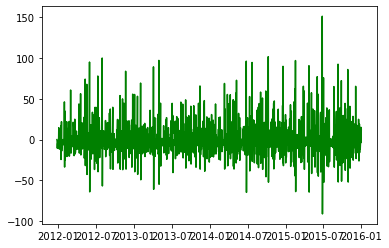

In [11]:
r2Data = training - testing.mean()
predictions = trainingModelFit.predict()
plt.plot(predictions, color="green")
plt.show()

In [12]:
print("The score after applying ARIMA feature engineering based on R^2 regression:")
print(r2_score(r2Data, predictions), "\n")
print("The R2 score subtracted from 100% accuracy gives:")
print(100-r2_score(r2Data, predictions))

The score after applying ARIMA feature engineering based on R^2 regression:
0.011198347405407039 

The R2 score subtracted from 100% accuracy gives:
99.98880165259459


In [ ]:
I am not really sure how to interpret the score that was given. I believe the accuracy is very wrong in either way that it is displayed. I would like to think I was able to attain nearly 100% accuracy, but that is very difficult to believe and in fact it is probably closer to 1%.


In [13]:
model = AutoReg(training, lags=1)
model_fit = model.fit()
prediction = model_fit.predict(len(testing), len(testing))
print("The results of applying Autoregression: ")
print(prediction, "\n")

The results of applying Autoregression: 
Date
2012-12-21    109.615189
Freq: D, dtype: float64 



In [14]:
model = ARMA(training, order=(2, 1))
model_fit = model.fit(disp=False)
print("The results of applying Autoregressive Moving Average: ")
prediction = model_fit.predict(len(testing), len(testing))
print(prediction, "\n")

The results of applying Autoregressive Moving Average: 
Date
2012-12-21    64.884684
Freq: D, dtype: float64 



In [15]:
model = SARIMAX(training, order=(1, 1, 1), seasonal_order=(2, 2, 2, 2))
model_fit = model.fit(disp=False)
print("The results of applying Seasonal Autoregressive Integrated Moving-Average:")
prediction = model_fit.predict(len(testing), len(testing))
print(prediction)

The results of applying Seasonal Autoregressive Integrated Moving-Average:
Date
2012-12-21    117.850634
Freq: D, dtype: float64


In [ ]:
#The highest score I was able to attain from any feature engineering model was from SARIMA